## Fake News Classifier Using LSTM network

Dataset: https://www.kaggle.com/c/fake-news/data#

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/ujwal-sah/my_tutorials/main/nlp_keras/data/fake_news/train.csv', index_col='id')
df.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [3]:
df.shape

(20800, 4)

In [4]:
#drop NaN values
df.dropna(subset = ["text", "label"], inplace=True)

In [5]:
df.shape

(20761, 4)

In [6]:
#independent features
X = df.iloc[:,:-1]
X.shape

(20761, 3)

In [7]:
#independent features
y = df.iloc[:,-1]
y.shape

(20761,)

### Onehot Representation

In [8]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot

In [9]:
#vocabulary_size
voc_size = 5000

In [10]:
X.reset_index(drop=True, inplace=True)

In [11]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [12]:
ps = PorterStemmer()

In [25]:
#data_preprocessing
corpus = []
for i in range(0, len(X)):
    if i%1000 == 0:
      print(i) #to check how much work is done
    review = re.sub('[^a-zA-Z]', ' ', X.loc[i, 'text'])
    review = review.lower()
    review = review.split()
    #stemming
    review = [ps.stem(word) for word in review if not word in stopwords.words("english")]
    review = " ".join(review)
    corpus.append(review)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [27]:
corpus[0]

'hous dem aid even see comey letter jason chaffetz tweet darrel lucu octob subscrib jason chaffetz stump american fork utah imag courtesi michael jolley avail creativ common licens apolog keith olbermann doubt worst person world week fbi director jame comey accord hous democrat aid look like also know second worst person well turn comey sent infam letter announc fbi look email may relat hillari clinton email server rank democrat relev committe hear comey found via tweet one republican committe chairmen know comey notifi republican chairmen democrat rank member hous intellig judiciari oversight committe agenc review email recent discov order see contain classifi inform long letter went oversight committe chairman jason chaffetz set polit world ablaz tweet fbi dir inform fbi learn exist email appear pertin investig case reopen jason chaffetz jasoninthehous octob cours know case comey actual say review email light unrel case know anthoni weiner sext teenag appar littl thing fact matter ch

In [68]:
onehot_repr = [one_hot(sentence, voc_size) for sentence in corpus]
onehot_repr[0]

[3774,
 2976,
 1214,
 4789,
 917,
 2948,
 3031,
 135,
 4725,
 4266,
 2578,
 229,
 1620,
 4551,
 135,
 4725,
 2127,
 3701,
 4660,
 1497,
 315,
 3201,
 838,
 538,
 1815,
 3233,
 1510,
 2828,
 1802,
 4332,
 4808,
 4067,
 3540,
 3950,
 469,
 703,
 4433,
 436,
 3672,
 2948,
 95,
 3774,
 1671,
 1214,
 3854,
 999,
 480,
 2304,
 1640,
 3540,
 3950,
 3656,
 3219,
 2948,
 3062,
 2684,
 3031,
 1702,
 4433,
 3854,
 4602,
 233,
 1414,
 4811,
 3789,
 4602,
 3023,
 3530,
 1671,
 2013,
 1974,
 497,
 2948,
 2486,
 4776,
 4266,
 4223,
 2168,
 1974,
 2881,
 2304,
 2948,
 4358,
 2168,
 2881,
 1671,
 3530,
 3442,
 3774,
 2456,
 4813,
 676,
 1974,
 1256,
 4116,
 4602,
 1858,
 2805,
 342,
 917,
 2669,
 4537,
 4615,
 3797,
 3031,
 3264,
 676,
 1974,
 2467,
 135,
 4725,
 663,
 3795,
 469,
 952,
 4266,
 4433,
 1957,
 4615,
 4433,
 303,
 4684,
 4602,
 3565,
 3151,
 681,
 2652,
 2267,
 135,
 4725,
 4249,
 1620,
 4536,
 2304,
 2652,
 2948,
 1159,
 3973,
 4116,
 4602,
 2656,
 1247,
 2652,
 2304,
 4146,
 4108,
 2687

In [29]:
# maximum length of a title
sent_len = len(onehot_repr[0])
for sent in onehot_repr:
    if sent_len < len(sent):
        sent_len = len(sent)
print(sent_len)

12059


### Embedding Representation

In [30]:
sent_length = sent_len
embedded_docs = pad_sequences(onehot_repr, padding="pre", maxlen=sent_length)
embedded_docs

array([[   0,    0,    0, ..., 3190, 3442, 4584],
       [   0,    0,    0, ..., 1300,  756,  724],
       [   0,    0,    0, ..., 4780, 1729, 1933],
       ...,
       [   0,    0,    0, ...,  945,  281, 4924],
       [   0,    0,    0, ..., 1152,   53, 3666],
       [   0,    0,    0, ...,  657, 3041, 2463]], dtype=int32)

In [32]:
len(embedded_docs), y.shape

(20761, (20761,))

In [33]:
X_final = np.array(embedded_docs)
y_final = np.array(y)

In [34]:
X_final.shape, y_final.shape

((20761, 12059), (20761,))

### Model Building

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Bidirectional, LSTM, Dropout
from kerastuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam

In [41]:
#hp signifies hyperparameters we are going to tune
def build_model(hp):
    #i.define model
    model = Sequential()
    #embedding layer
    model.add(Embedding(input_dim = voc_size,
                        output_dim=hp.Int("embedded_vector_features", min_value=16, max_value=512, step=16),
                        input_length=sent_length))
    #LSTM layer
    model.add(Bidirectional(LSTM(units=hp.Int("lstm_units", min_value=16, max_value=128, step=16))))
    #dropout
    model.add(Dropout(rate=hp.Choice("dropout", [0.3, 0.4, 0.5])))
    #output Layer
    model.add(Dense(units=1, activation="sigmoid"))
    
    #ii.compile the model
    #we have to define the optimizer, loss function and evaluating metric while compiling the model
    #hp.Choice signifies the choice is from a list
    model.compile(optimizer=Adam(hp.Choice("learning_rate", [1e-2,1e-3,1e-4])),
                  loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [42]:
tuner = RandomSearch(build_model, objective='val_loss',
                    max_trials=5, directory="fake_news_detection_bilstm",
                    project_name="fake_news_detection_bilstm")

In [43]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
embedded_vector_features (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 512, 'step': 16, 'sampling': None}
lstm_units (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 16, 'sampling': None}
dropout (Choice)
{'default': 0.3, 'conditions': [], 'values': [0.3, 0.4, 0.5], 'ordered': True}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [44]:
tuner.search(X_train, y_train, epochs=1, validation_split=0.2)

Trial 5 Complete [00h 17m 18s]
val_loss: 0.3298620283603668

Best val_loss So Far: 0.24496260285377502
Total elapsed time: 01h 21m 21s
INFO:tensorflow:Oracle triggered exit


In [55]:
model_kt = tuner.get_best_models(num_models=1)[0]

In [56]:
model_kt.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 12059, 128)        640000    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 738,945
Trainable params: 738,945
Non-trainable params: 0
_________________________________________________________________


### Model Training

In [57]:
#fit
model_history = model_kt.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=64)

Epoch 1/2
218/218 [==============================] - 638s 3s/step - loss: 0.1707 - accuracy: 0.9429 - val_loss: 0.1991 - val_accuracy: 0.9174
Epoch 2/2
218/218 [==============================] - 642s 3s/step - loss: 0.1133 - accuracy: 0.9630 - val_loss: 0.2457 - val_accuracy: 0.9210


In [58]:
#save the model as a h5 file
model_kt.save("fake_news_bilstm.h5")

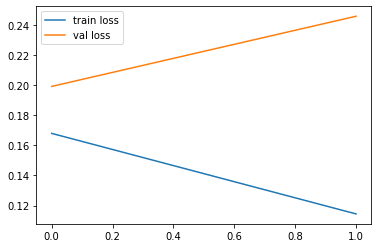

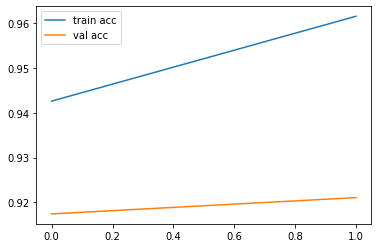

In [59]:
# plot the loss
plt.plot(model_history.history['loss'], label='train loss')
plt.plot(model_history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(model_history.history['accuracy'], label='train acc')
plt.plot(model_history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

### Performance Metrics and Accuracy

In [64]:
y_pred = model_kt.predict(X_test)
y_pred_binary = y_pred > 0.5
y_pred_binary

array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
accuracy_score(y_test, y_pred_binary)

0.9210449503794512

In [67]:
confusion_matrix(y_test, y_pred_binary)

array([[3121,  313],
       [ 228, 3190]])